# Лабораторная работа №5 
# Линейная регрессия. Градиентный спуск

**Выполнили студенты Зимин Андрей Валерьевич и Жилин Андрей Игоревич**

## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
import seaborn as sns
import datetime

In [2]:
# вспомогательная функция для вывода метрик
def print_metriks(y_true, y_pred, title=""):
    print(title)
    print(f'MSE: {mse(y_true, y_pred):.03f}')
    print(f'MAE: {mae(y_true, y_pred):.03f}')
    print(f'R^2: {r2(y_true, y_pred):.03f}')
    print()

## Чтение датасета
Задача: Загрузите из интернета данные о росте и весе 25000 подростков в возрасте 18 лет

In [3]:
df = pd.read_csv("./data/height_weight.csv", sep=";")
df['Height(Inches)'] = df['Height(Inches)'].apply(float)
df["Weight(Pounds)"] = df["Weight(Pounds)"].apply(float)
df.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


Данные загружены, импорт корректный

## Задание
Постройте гистограммы распределения обоих параметров, рассмотрев разбиение диапазона значений на 16 интервалов

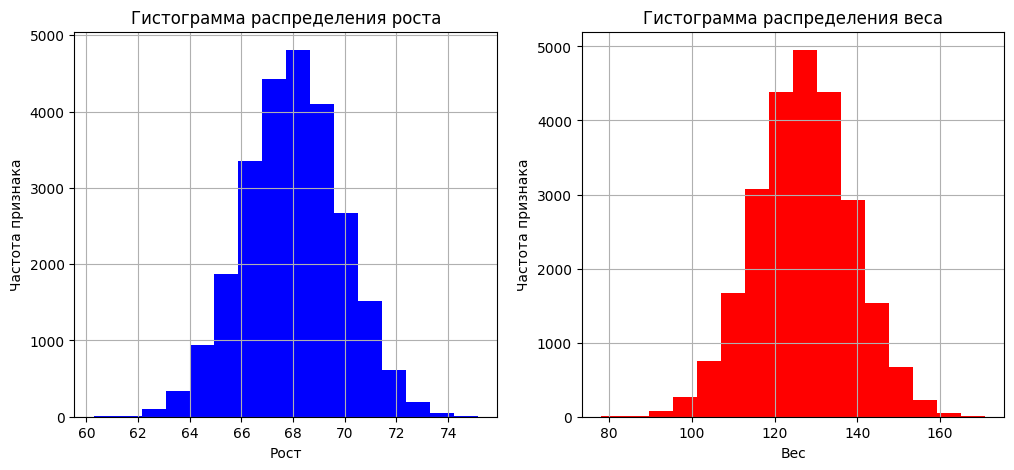

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
df['Height(Inches)'].hist(bins=16, ax=ax[0], color="blue")
df['Weight(Pounds)'].hist(bins=16, ax=ax[1], color="red")
ax[0].set_xlabel("Рост")
ax[0].set_ylabel("Частота признака")
ax[0].set_title("Гистограмма распределения роста")
ax[1].set_xlabel("Вес")
ax[1].set_ylabel("Частота признака")
ax[1].set_title("Гистограмма распределения веса")
print()

Визуально распределение признаков очень близко к нормальному распределению.

## Задание
Постройте диаграмму рассеяния (X-Y диаграмму) этих параметров.

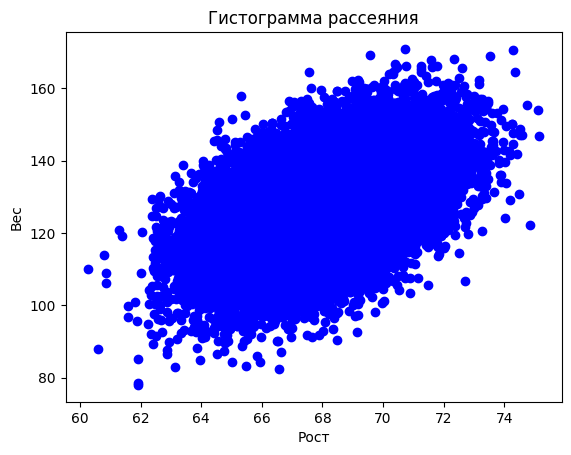

In [5]:
plt.scatter(df['Height(Inches)'], df['Weight(Pounds)'], color="Blue")
plt.xlabel('Рост')
plt.ylabel('Вес')
plt.title('Гистограмма рассеяния')
print()

Судя по диаграмме признаки явно коррелируют между собой. Также в данных нет выбросов.

## Задание
Вычислите коэффициент корреляции Пирсона между этими параметрами.

In [6]:
print(f"Коэффициент корреляции равен {df['Height(Inches)'].corr(df['Weight(Pounds)']):.02f}")

Коэффициент корреляции равен 0.50


Судя по абсолютной величине коэффициента корреляции, вес и рост имеют среднюю корреляцию.

## Задание
Используя МНК найдите коэффициенты линейной регрессии веса от роста. 

In [7]:
x = df["Height(Inches)"]
X = np.dstack([np.array(x), np.ones(len(x))])[0]
y = df["Weight(Pounds)"]
print("Преобразованный датасет:")
X[:5, :]

Преобразованный датасет:


array([[65.78331,  1.     ],
       [71.51521,  1.     ],
       [69.39874,  1.     ],
       [68.2166 ,  1.     ],
       [67.78781,  1.     ]])

Выделили признаки, добавили единичный столбец.

Оптимальные веса по методу наименьших квадратов:
$$w=(X^TX)^{-1}X^Ty$$

In [8]:
w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
y_pred = np.dot(w, X.T)

print(f'Коэффициент наклона (w0): {w[0]:.02f}')
print(f'Коэфициент вертикального смещения (w1): {w[1]:.02f}')

Коэффициент наклона (w0): 3.08
Коэфициент вертикального смещения (w1): -82.58


Посчитали коэффициенты весов по МНК, теперь нужно посмотреть на распределение

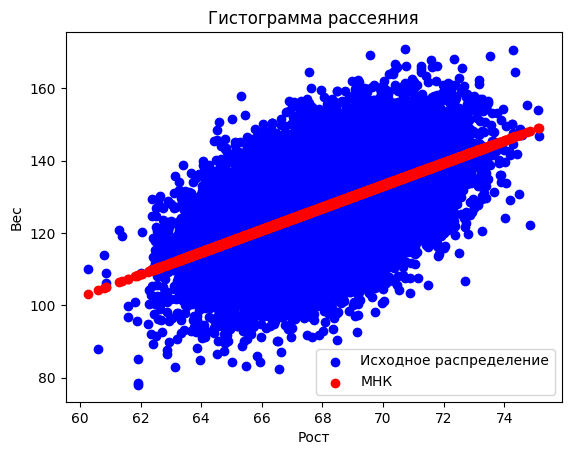

In [9]:
plt.scatter(x, y, color="Blue", label="Исходное распределение")
plt.scatter(x, y_pred, color="Red", label="МНК")
plt.xlabel('Рост')
plt.ylabel('Вес')
plt.title('Гистограмма рассеяния')
plt.legend()
print()

Судя по диаграмме получилось адекватное предсказание. Тенденция зависимости веса от роста определяется верно.

## Задание
Оцените качество регрессионной модели, используя оценки: среднеквадратическая ошибка MSE, средняя абсолютная ошибка MAE, коэффициент детерминации R2.

$$MSE = \frac{1}{n}\Sigma_{i=1}^{n}{(Y_i - \langle w, X_i \rangle)^2}$$
$$MAE = \frac{1}{n}\Sigma_{i=1}^{n}{(Y_i - \langle w, X_i \rangle)}$$
$$R^2 = 1 - \frac{\Sigma_{i=1}^{n}{(Y_i - \langle w, X_i \rangle)^2}}{\Sigma_{i=1}^{n}{(Y_i - \overline{Y})^2}}$$

In [10]:
print_metriks(y, y_pred, "Метод наименьших квадратов")

Метод наименьших квадратов
MSE: 101.589
MAE: 8.038
R^2: 0.253



Проще всего интерпретировать МАЕ - в среднем предсказание от действительного значения отличается на 8 фунтов ≈ 3,5 кг.  
Средний квадрат отклонения составляет 102 фунта в квадрате.  
Коэффициент детерминации = 0.253. Значит 25.3% изменчивости наблюдаемой переменной можно объяснить с помощью построенной модели.

## Задание
Реализуйте методы пакетного градиентного спуска с одним параметром и стохастического градиентного спуска. Величину ε для оценки точности выберите сами исходя из требования наличия не менее 100 итераций.
На одном поле изобразите графики изменения значения ошибки модели на каждой итерации.
Сравните время работы обоих методов (модуль time). Сделайте выводы.


## Реализация градиентного спуска

Для градиентного спуска используют следующие формулы:

$$ a(X_i) = \langle w, X_i \rangle $$

$$ Q(a, X) = \frac{1}{n} \Sigma_{i=1}^{n}(a(X_i) - y_i)^2$$

$a(x)$ - функция получения предсказания для вектора-объекта и вектора-весов.  
$Q(a, X)$ - функционал ошибки

При этом градиент Q(a, X) можно посчитать двумя способами:  
1) По-определению $$\nabla_wQ = (\frac{dQ}{dw_1}, \frac{dQ}{dw_2}, ..., \frac{dQ}{dw_k})$$

2) Продифференцировать руками $$\nabla_wQ = \frac{2}{N}X^T(Xw - y)$$

Тогда имея веса модели $w^{(0)}$ как стартовое приближение, на $i+1$-вом шаге будем обновлять веса таким образом:

$$w^{(i+1)} = w^{(i)} - \alpha{\nabla_{w^{(i)}}Q}$$

При этом условие остановки, для некоторого заранее заданного $\epsilon$:

$$ \left\Vert {Xw^{(n)} - Xw^{(n-1)}} \right\|_2^2 < \epsilon $$


In [11]:
class GradientDescent:
    def __init__(self, train_x, train_y, h = 0.00005, eps=0.1, start_weights=None, logging=False, min_iterations=0):

        #часть за данные
        self.X = train_x #тренировочная выборка
        self.y = train_y #целевой признак
        self.strategy = ""

        #метаданные
        self.width = len(train_x[0]) + 1 #ширина тренировочной выборки
        self.height = len(train_x) #высота тренировочной выборки
        
        #модель 
        self.min_iterations = min_iterations
        self.h = h #шаг градиентного спуска h > 0
        self.eps = eps #точность градиентного спуска
        if not start_weights: #задание стартовых весов
            self.w = np.full(self.width, 1)
        self.X = np.concatenate((np.ones(self.height).reshape(-1, 1), self.X), axis=1) #фиктивная единица
        self.q = self.calc_q() # инизиализируем ошибку

        #логи
        self.logging = logging
        self.qs = np.array([]) #величина ошибки
        self.curr_timer = None
        self.timer = np.array([]) #массив для хранение время итераций

    def start_timer(self):
        self.curr_timer = datetime.datetime.now()
    
    def stop_timer(self):
        self.timer = np.append(self.timer, np.array(datetime.datetime.now() - self.curr_timer))

    def get_time(self):
        return self.timer.sum()

    def get_times(self):
        return self.timer

    def grad(self, X = None, y = None): #вычисление градиента по пакету(подходит для mini-batch, package и stochastic)
        if X is None or y is None or np.size(X)==0 or np.size(y)==0:
            X = self.X
            y = self.y

        return (X.T.dot(X.dot(self.w) - y[:, 0]))*(2/self.height)

    def start_package_gradient_descent(self):
        self.strategy = "package"
        q = 2*self.q
        iteration_number = 0

        if self.logging:
            print("Величина ошибки на каждом шаге")

        while abs(self.q - q) > self.eps or iteration_number < self.min_iterations:
            
            self.start_timer()
            q = self.q
            self.w = self.w - self.h * self.grad()
            self.qs = np.append(self.qs, q) 
            self.q = self.calc_q()
            iteration_number += 1
            self.stop_timer()

            if self.logging:
                print(f"Шаг {iteration_number}: ошибка {round(self.q, int(np.log(1/self.eps)/np.log(10)))};") #логи        
        if self.logging:
            print(f"Время работы: {self.get_time().microseconds/1000:.02f} мс")
        return self.w

    def start_mini_batch_gradient_descent(self, batch_size = 1):
        if batch_size == 1:
            self.strategy = "Stochastic"
        else:
            self.strategy = 'Mini-batch'

        iteration_number = 0
        q = 2*self.q
        if self.logging:
            print("Величина ошибки на каждом шаге:")
        while abs(self.q - q) > self.eps or iteration_number < self.min_iterations: #объявляем цикл, для пакетного градиентного спуска
            
            self.start_timer()
            q = self.q #переприсваеваем значение ошибки 
            idx = np.random.randint(self.height, size=batch_size) # формируем индексы пакета
            self.w = self.w - self.h * self.grad(self.X[idx, :], self.y[idx, :]) #вычисляем градиент по пакету и меняем веса
            self.qs = np.append(self.qs, q) #запоминаем значение ошибки
            self.q = self.calc_q() #вычисление значение ошибки после новых весов
            iteration_number += 1
            self.stop_timer()

            if self.logging:
                print(f"Шаг {iteration_number}: ошибка {round(self.q, int(np.log(1/self.eps)/np.log(10)))};") #логи 
        if self.logging:
            print(f"Время работы: {self.get_time().microseconds/1000:.02f} мс")
        return self.w

    def calc_q(self):
        return np.mean((np.dot(self.X, self.w) - self.y[:, 0]) ** 2)

    def predict(self, X):
        X =  np.concatenate((np.ones(len(X)).reshape(-1, 1), X), axis=1) #фиктивная единица
        return np.dot(X, self.w).reshape(-1, 1)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

Импортируем реализованные методы, чтобы в дальнейшем сравнить их с нашей реализацией

In [13]:
""" Наша реализация """
x = df[['Height(Inches)']].to_numpy()
y = df[["Weight(Pounds)"]].to_numpy()

print("Наш пакетный градиентный спуск \n")
PGD = GradientDescent(x, y, logging=True, min_iterations=10, eps=0.01) 
PGD.start_package_gradient_descent()
my_grad_y_pred = PGD.predict(x)
print_metriks(y, my_grad_y_pred)

""" SKLearn """
x = df[["Height(Inches)"]]
y = df[["Weight(Pounds)"]]

print("Пакетный градиентный спуск sklearn")
model = LinearRegression()
timer = datetime.datetime.now()
model.fit(x, y)
time_deltha = datetime.datetime.now() - timer
package_grad_y_pred = model.predict(x)
print(f"Время работы: {time_deltha.total_seconds()*1000:.02f} мс")
print_metriks(y, package_grad_y_pred)

Наш пакетный градиентный спуск 

Величина ошибки на каждом шаге
Шаг 1: ошибка 1083.81;
Шаг 2: ошибка 388.96;
Шаг 3: ошибка 188.41;
Шаг 4: ошибка 130.53;
Шаг 5: ошибка 113.83;
Шаг 6: ошибка 109.01;
Шаг 7: ошибка 107.61;
Шаг 8: ошибка 107.21;
Шаг 9: ошибка 107.1;
Шаг 10: ошибка 107.06;
Шаг 11: ошибка 107.05;
Время работы: 17.27 мс

MSE: 107.054
MAE: 8.244
R^2: 0.213

Пакетный градиентный спуск sklearn
Время работы: 4.86 мс

MSE: 101.589
MAE: 8.038
R^2: 0.253



У модели sklearn метрики лучше чем у нашей реализации.

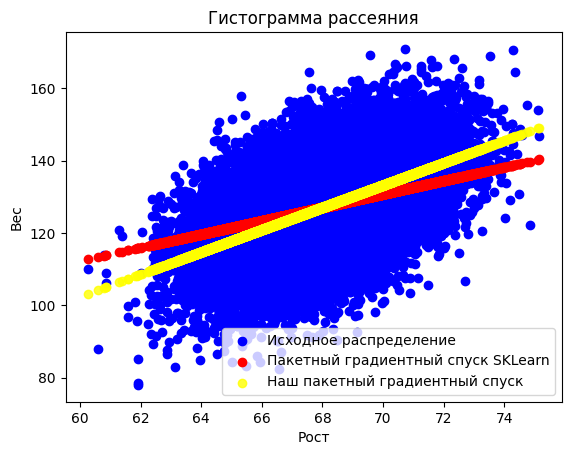

In [14]:
plt.scatter(df["Height(Inches)"], df["Weight(Pounds)"], color='Blue', label="Исходное распределение")
plt.scatter(df['Height(Inches)'], my_grad_y_pred, color="Red", label="Пакетный градиентный спуск SKLearn")
plt.scatter(df["Height(Inches)"], package_grad_y_pred, color="Yellow", label="Наш пакетный градиентный спуск", alpha = 0.8)

plt.xlabel('Рост')
plt.ylabel('Вес')
plt.title('Гистограмма рассеяния')
plt.legend()
print()

Визуально модель SKLearn кажется более оптимальной, чем наша модель. Наша модель сошлась к некоторому минимому, но к другому, отличному от оптимального. 

In [15]:
""" Наша реализация """
x = df[['Height(Inches)']].to_numpy()
y = df[["Weight(Pounds)"]].to_numpy()

print("Наш стохастический градиентный спуск")
PSD = GradientDescent(x, y, 0.75, 0.1, logging=False) #инизиализируем стохастический градиентный спуск
PSD.start_mini_batch_gradient_descent()

sgd_grad_y_pred = PGD.predict(x)
print(f"Время работы: {PSD.get_time().microseconds/1000:.02f} мс")
print_metriks(y, sgd_grad_y_pred)

""" SKLearn """
x = df[["Height(Inches)"]]
y = df["Weight(Pounds)"]

print("Стохастический градиентный спуск sklearn")
model = SGDRegressor()
timer = datetime.datetime.now()
model.fit(x, y)
time_deltha = datetime.datetime.now() - timer
sgd_grad_y_pred = model.predict(x)
print(f"Время работы: {time_deltha.total_seconds()*1000:.02f} мс")
print_metriks(y, sgd_grad_y_pred)

Наш стохастический градиентный спуск
Время работы: 31.07 мс

MSE: 107.054
MAE: 8.244
R^2: 0.213

Стохастический градиентный спуск sklearn
Время работы: 1806.56 мс

MSE: 136330402080.117
MAE: 298468.598
R^2: -1002642539.740



c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Судя по метрикам наш стохастический градиентный спуск сошёлся в ту же точку, а SGDRegressor не сходиться - нужно подбирать параметры.

## Задание
Рассматривая вес как результативный признак (y), а рост как факторный признак ($ x_0 $), сформируйте ещё 6 штук факторных признаков типа (фантазируйте!):

y - Weight(Pounds) - целевой признак

$ x_0 $ - Height(Inches) - факторный признак

Были добавлены следующие признаки

$$ x_1 = (x_0 - \overline{x_0})^{2} $$
$$ x_2 = x_0^{2} - 5 $$
$$ x_3 = (x_0 + \log_2{x_0})^{2} $$
$$ x_4 = \log(x_0) $$
$$ x_5 = \log_2^{2}{x_0} + \log_2^{3}{x_0} $$
$$ x_6 = x_0 \log_2{x_0} $$
$$ x_7 = \sin(x_0) $$
$$ x_8 = \cos(x_0) $$
$$ x_9 = \exp(\cos(x_0) + \sin(x_0))$$
$$ x_{10} = x_0 \sin(x_0) $$


In [16]:
x0 = df['Height(Inches)']

df['x0^2 - x0_mean'] =  (x0 - np.full(len(x0), - x0.mean()))**2
df['x0^2 - 5'] = x0**2 - np.full(len(x0), 5)
df['(x0 + log2(x0))^2'] = (x0 + np.log2(x0))**2
df['log2(x0)'] = np.log2(x0)
df['log2(x0)^2 + log2(x0)^3'] = np.log(x0)**2 + np.log(x0)**3
df['x0*log2(x0)'] = x0*np.log2(x0)
df['sin(x0)'] = np.sin(x0)
df['cos(x0)'] = np.cos(x0)
df['exp(cos(x0) + sin(x0)'] = np.exp(np.cos(x0) + np.sin(x0))
df['x1 * sin(x1)'] = x0 * np.sin(x0)

df

,Height(Inches),Weight(Pounds),x0^2 - x0_mean,x0^2 - 5,(x0 + log2(x0))^2,log2(x0),log2(x0)^2 + log2(x0)^3,x0*log2(x0),sin(x0),cos(x0),exp(cos(x0) + sin(x0),x1 * sin(x1)
0,65.78331,112.9925,17896.131510,4322.443875,5158.537540,6.039650,90.894498,397.308148,0.188992,-0.981979,0.452491,12.432531
1,71.51521,136.4873,19462.572353,5109.425261,6033.465933,6.160178,96.081701,440.546438,0.675337,-0.737510,0.939720,48.296840
2,69.39874,153.0269,18876.521435,4811.185114,5702.602455,6.116838,94.194430,424.500820,0.279911,0.960026,3.455396,19.425485
3,68.21660,142.3354,18553.086078,4648.504516,5521.775605,6.092051,93.126236,415.579003,-0.782355,0.622832,0.852551,-53.369614
4,67.78781,144.2971,18436.459213,4590.187185,5456.889768,6.082954,92.736222,412.350127,-0.970484,0.241167,0.482238,-65.786964
...,...,...,...,...,...,...,...,...,...,...,...,...
24995,69.50215,118.0312,18904.947512,4825.548855,5718.556165,6.118986,94.287386,425.282662,0.377515,0.926003,3.682230,26.238128
24996,64.54826,120.1932,17567.215715,4161.477869,4978.793517,6.012306,89.744182,388.083910,0.989417,-0.145097,2.326397,63.865178
24997,64.69855,118.2655,17607.077588,4180.902372,5000.499704,6.015661,89.884809,389.204575,0.956540,-0.291601,1.944371,61.886745
24998,67.52918,132.2682,18366.292062,4555.190151,5417.934380,6.077439,92.500314,410.404481,-0.999887,-0.015061,0.362421,-67.521520


Парная диаграмма рассеяния

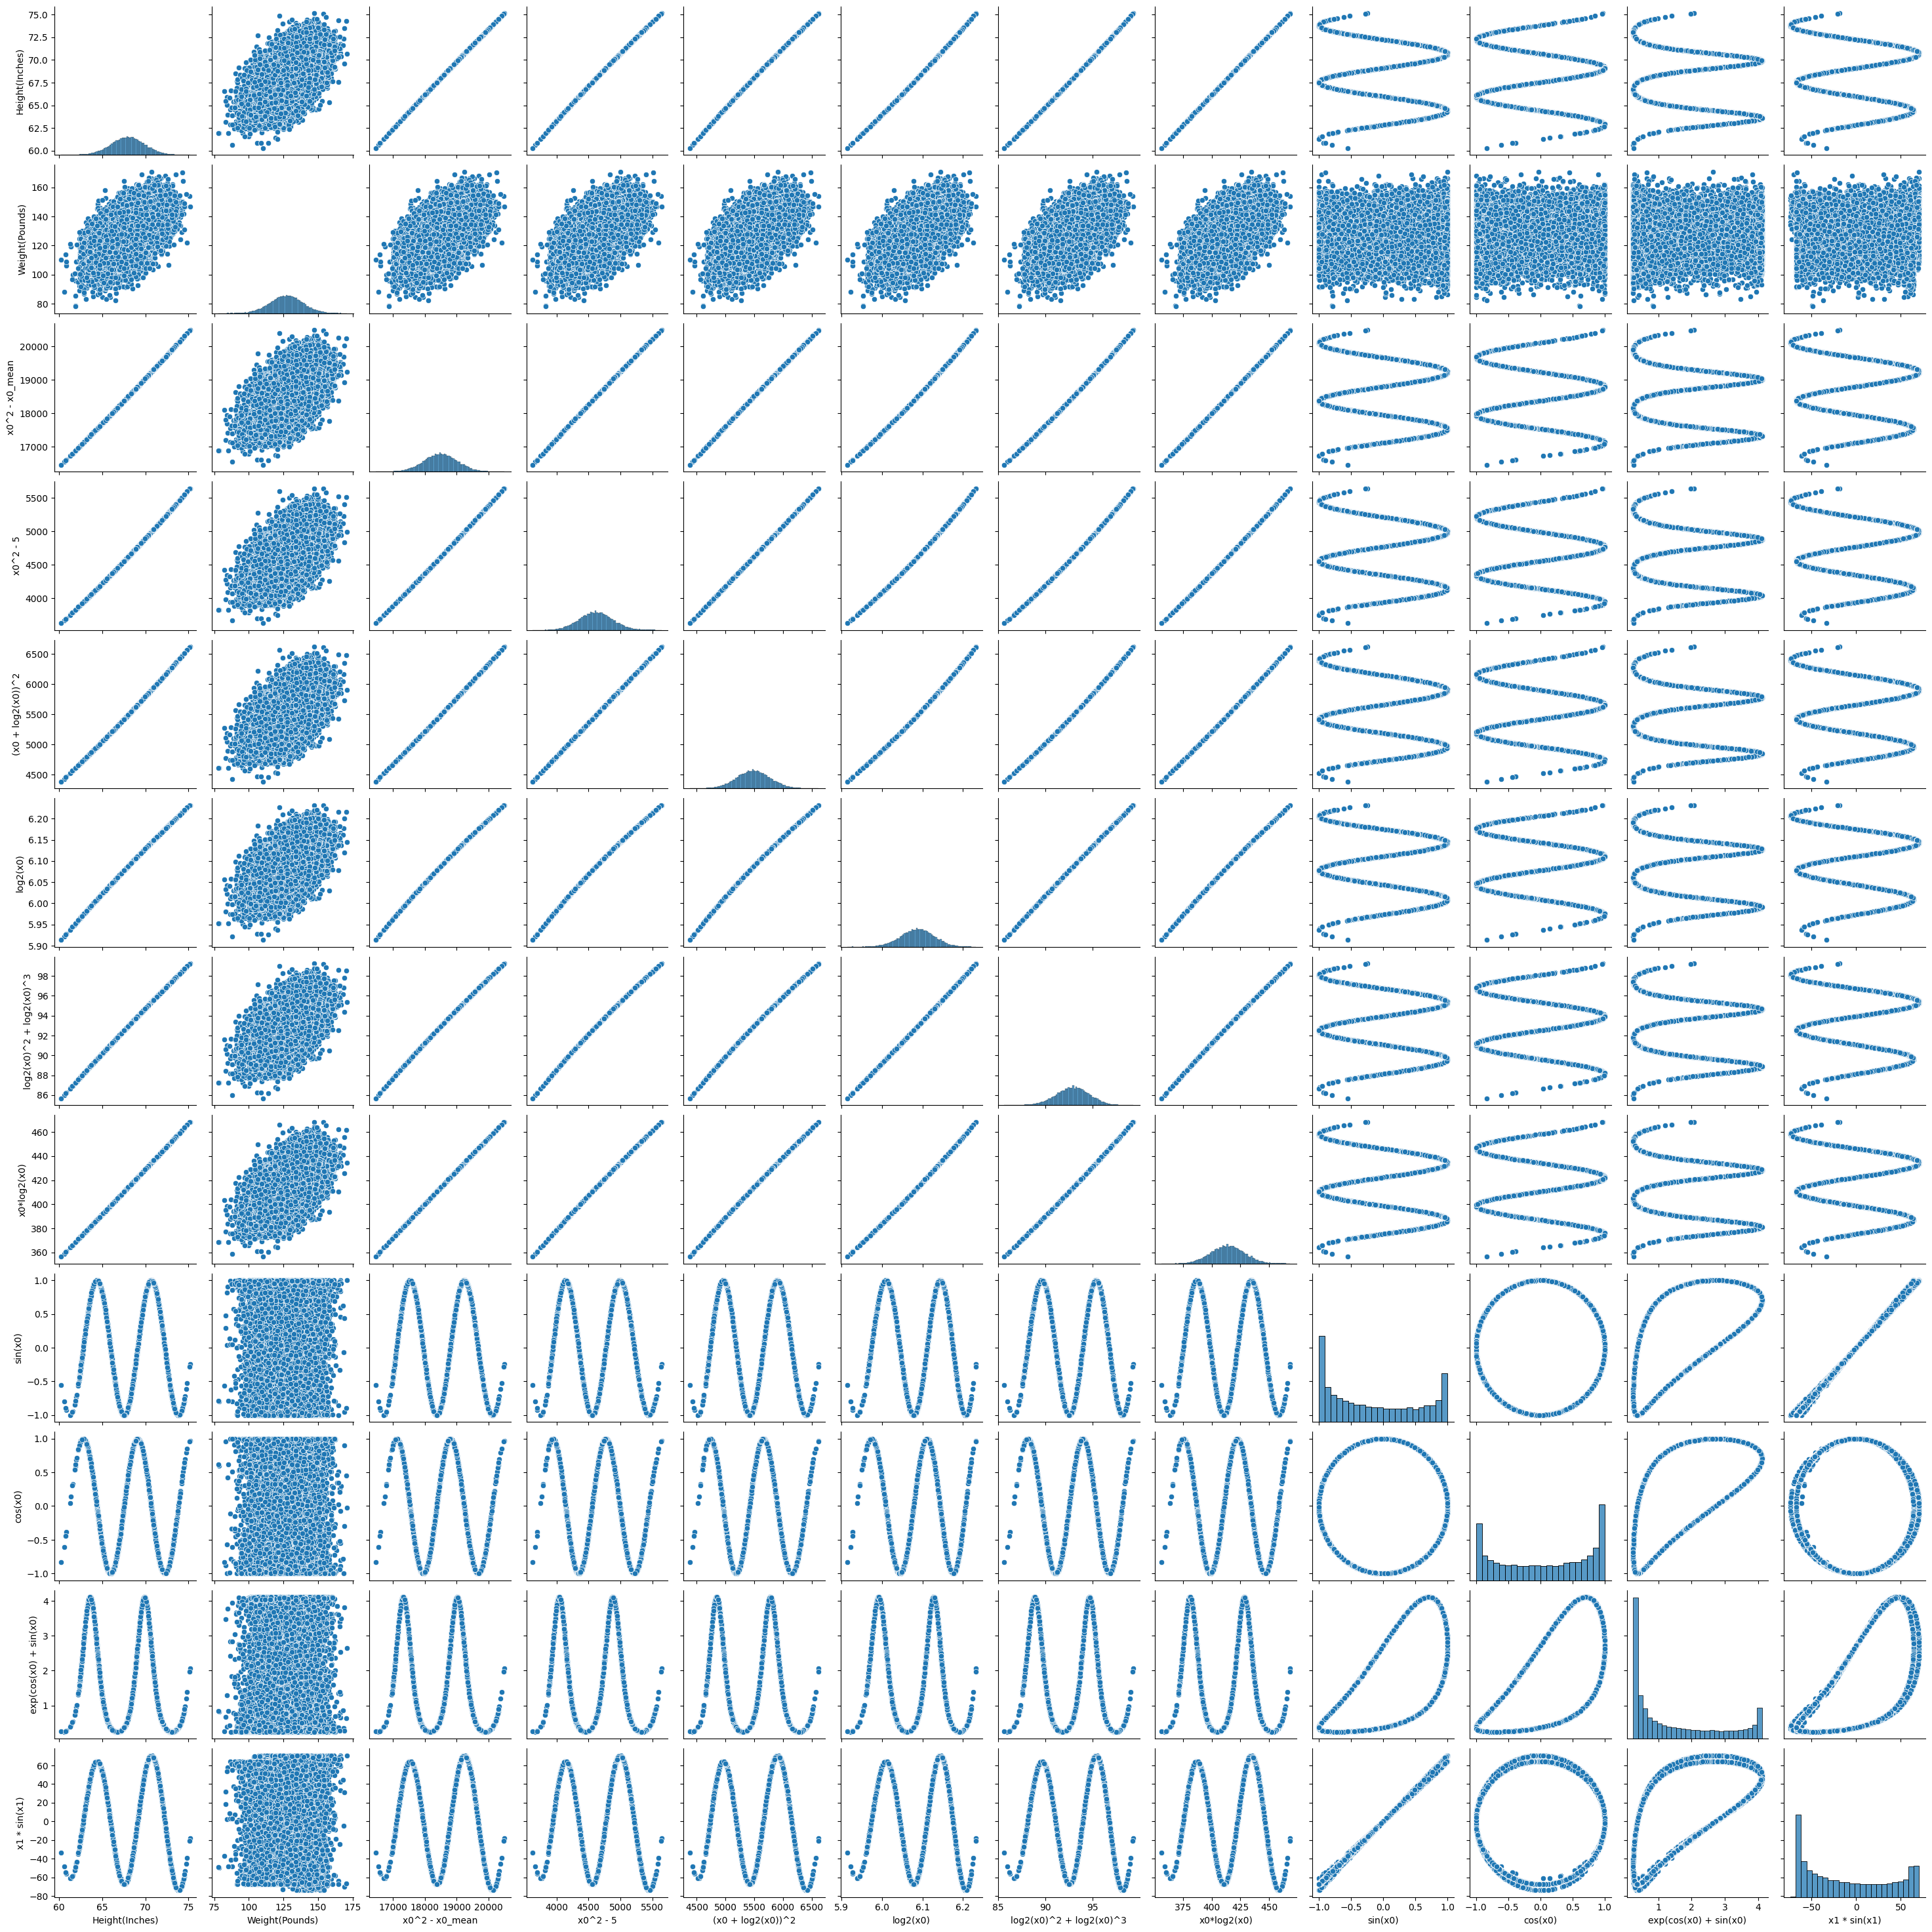

In [17]:
sns.pairplot(df)

Тепловые диаграммы корреляции

<Axes: >

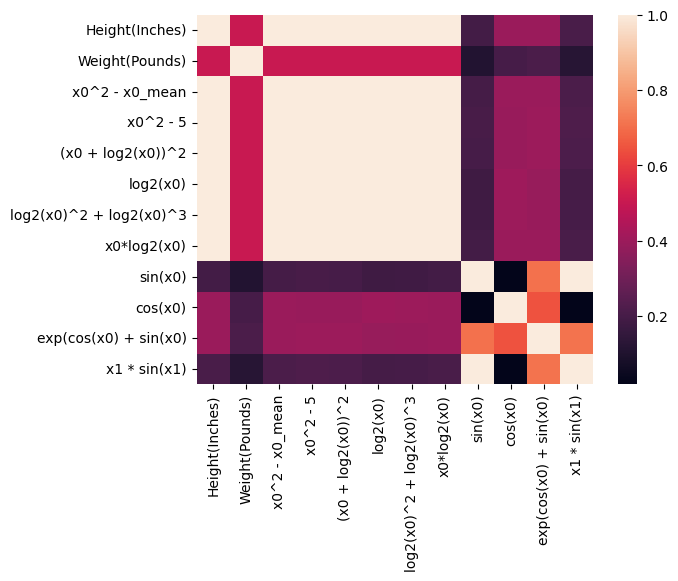

In [18]:
sns.heatmap(df.corr())

<Axes: >

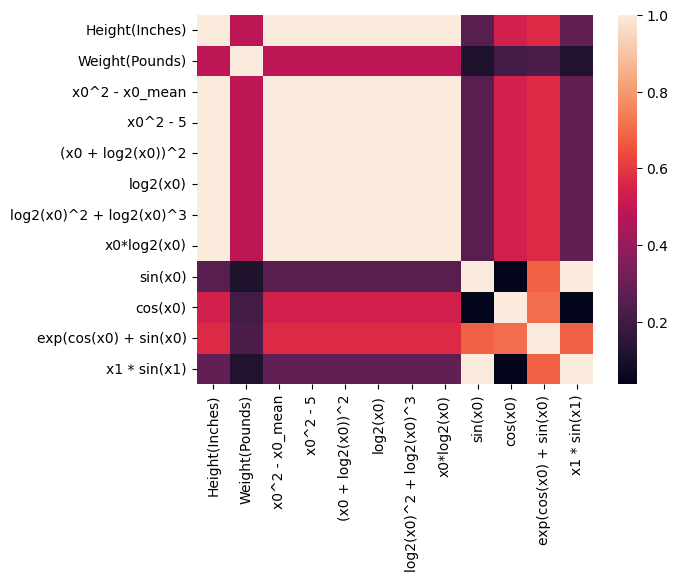

In [19]:
sns.heatmap(df.corr(method='spearman'))

<Axes: >

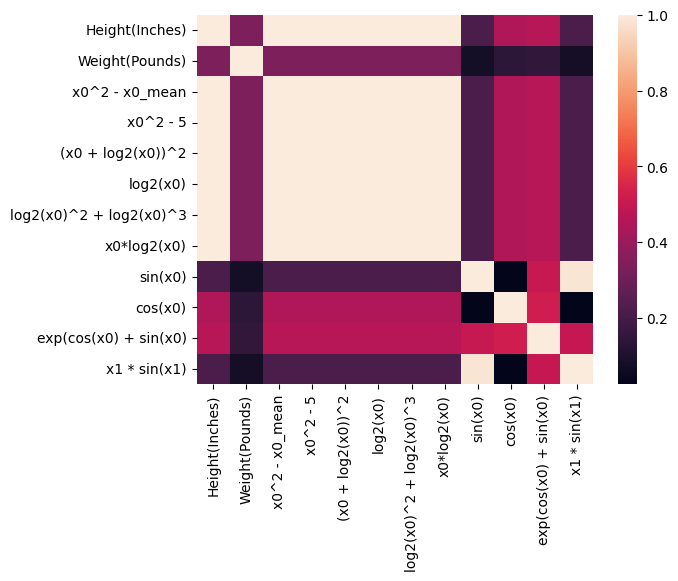

In [20]:
sns.heatmap(df.corr(method='kendall'))

In [21]:
model = LinearRegression()

features_df = df.drop(columns='Weight(Pounds)')
target_df = df[['Weight(Pounds)']]

model.fit(features_df, target_df) 
timer = datetime.datetime.now()
model.fit(features_df, target_df) 
time_deltha = datetime.datetime.now() - timer
grad_y_pred = model.predict(features_df) 
print(f"Время работы: {time_deltha.total_seconds()*1000:.02f} мс")

for i, x in enumerate(model.coef_[0]):
    print(f"x_{i} = {x:.02f}", )
print(f"b = {model.intercept_[0]:.02f}",)

print_metriks(y, grad_y_pred)

Время работы: 0.00 мс
x_0 = 14046939.91
x_1 = 6127094.18
x_2 = -2153361853.65
x_3 = 2147333951.29
x_4 = -7937278481.31
x_5 = -704026735.51
x_6 = -4375228424.91
x_7 = -54.51
x_8 = 3.36
x_9 = 0.11
x_10 = 0.80
b = -29647938644.45

MSE: 101.543
MAE: 8.036
R^2: 0.253



Метрики не улучшились

C:\Users\Sai\AppData\Local\Temp\ipykernel_5888\1532102803.py:99: RuntimeWarning: overflow encountered in square
  return np.mean((np.dot(self.X, self.w) - self.y[:, 0]) ** 2)
C:\Users\Sai\AppData\Local\Temp\ipykernel_5888\1532102803.py:55: RuntimeWarning: invalid value encountered in scalar subtract
  while abs(self.q - q) > self.eps or iteration_number < self.min_iterations:
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\Sai\AppData\Local\Temp\ipykernel_5888\1532102803.py:81: RuntimeWarning: invalid value encountered in scalar subtract
  while abs(self.q - q) > self.eps or iteration_number < self.min_iterations: #объявляем цикл, для пакетного градиентного спуска


Text(0, 0.5, 'Величина ошибки')

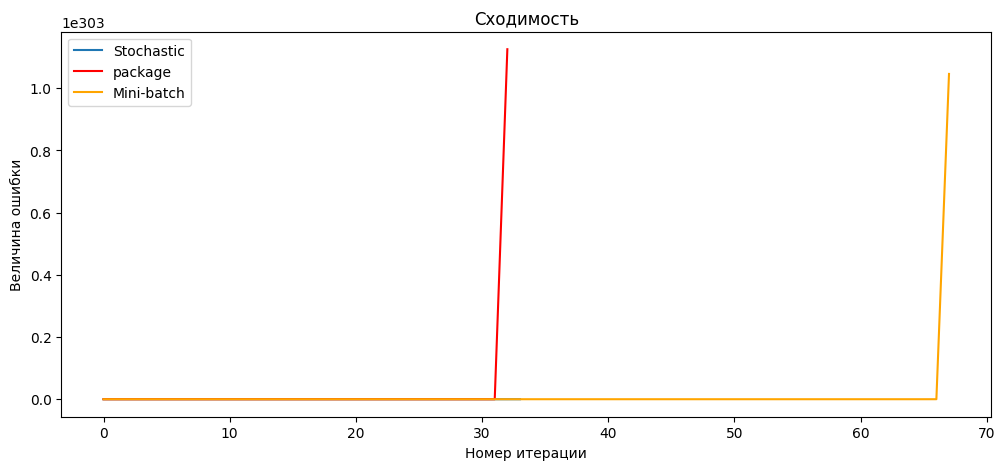

In [22]:
features_df = df.drop(columns='Weight(Pounds)').to_numpy()
target_df = df[['Weight(Pounds)']].to_numpy()

PGD = GradientDescent(features_df, target_df)
PGD.start_package_gradient_descent()
PSD = GradientDescent(features_df, target_df, 0.75, 0.1)
PSD.start_mini_batch_gradient_descent()
PMBGD = GradientDescent(features_df, target_df)
PMBGD.start_mini_batch_gradient_descent(batch_size=100)

fig, ax = plt.subplots(1, 1, figsize=(12, 5))

df_err = pd.DataFrame(PSD.qs, columns=[PSD.strategy])
df_err.plot(ax=ax)

df_err = pd.DataFrame(PGD.qs, columns=[PGD.strategy])
df_err.plot(ax=ax, color='red')

df_err = pd.DataFrame(PMBGD.qs, columns=[PMBGD.strategy])
df_err.plot(ax=ax, color='orange')

ax.set_title('Сходимость')
ax.set_xlabel("Номер итерации")
ax.set_ylabel("Величина ошибки")

Text(0, 0.5, 'Время')

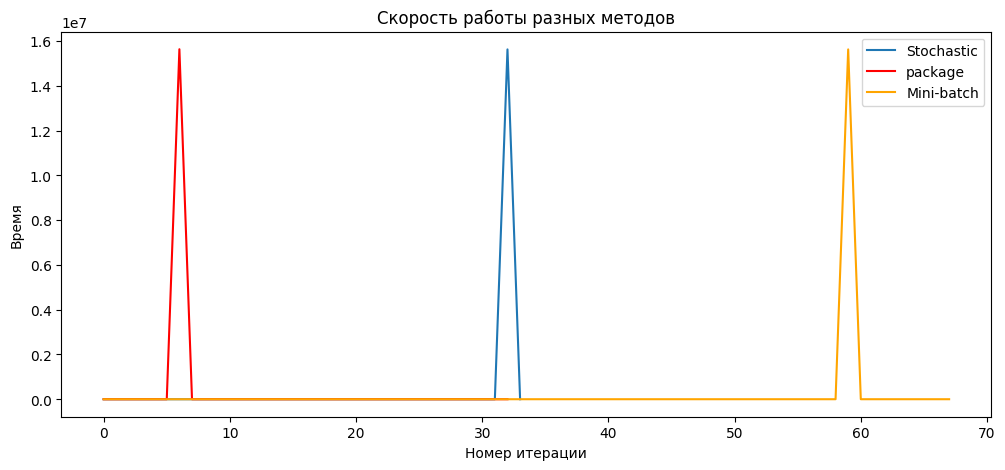

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))

df_err = pd.DataFrame(PSD.get_times()[1:], columns=[PSD.strategy])
df_err.plot(ax=ax)

df_err = pd.DataFrame(PGD.get_times()[1:], columns=[PGD.strategy])
df_err.plot(ax=ax, color='red')

df_err = pd.DataFrame(PMBGD.get_times()[1:], columns=[PMBGD.strategy]) #используем логарифмическую шкалу(возможно не стоит)
df_err.plot(ax=ax, color='orange')

ax.set_title('Скорость работы разных методов')
ax.set_xlabel("Номер итерации")
ax.set_ylabel("Время")